### HEART DISEASE PREDICTION

##### submitted by: Hangsajyoti Dhar, 170310007020

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


([<matplotlib.axis.XTick at 0x1e3bac6d248>,
 <a list of 14 Text xticklabel objects>)

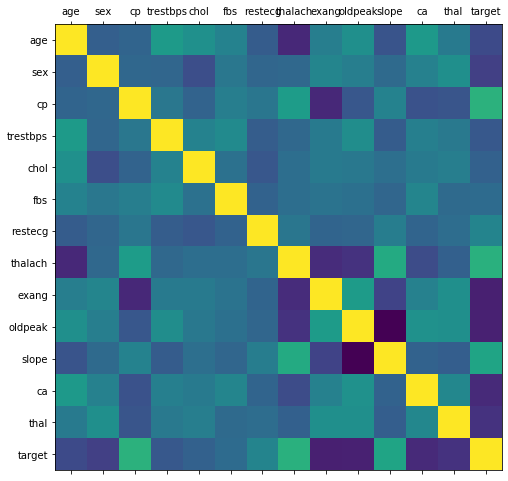

In [5]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']= 15,8
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3BB9617C8>,
      dtype=object)

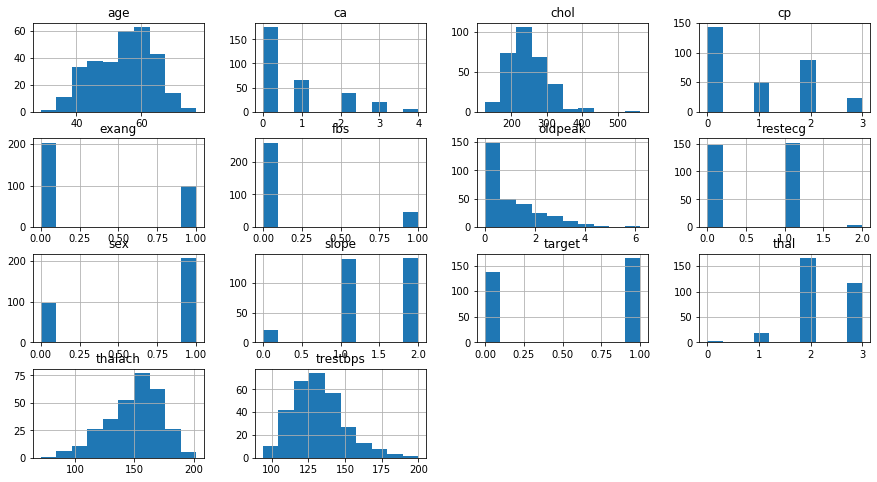

In [7]:
df.hist()

In [8]:
df.shape

(303, 14)

In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0, 0.5, 'count')

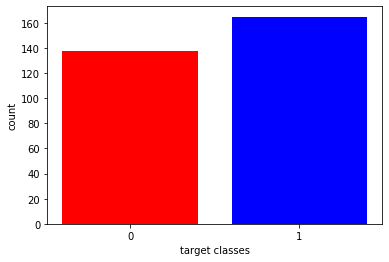

In [10]:
rcParams['figure.figsize']= 6,4
plt.bar(df['target'].unique(), df['target'].value_counts(), color= ['blue','red'])
plt.xticks([0,1])
plt.xlabel('target classes')
plt.ylabel('count')

In [11]:
#data preprocessing- feature scaling done 
from sklearn.preprocessing import StandardScaler

df = pd.get_dummies(df, columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal'])


In [12]:
standardScaler= StandardScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [16]:
x = df.drop(['target'], axis=1)
y = df['target'] 

In [17]:
x

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [18]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)#67% in train set, 33% in test set

In [20]:
print(x_train)

          age  trestbps      chol   thalach   oldpeak  sex_0  sex_1  cp_0  \
252  0.841908  0.364165  0.922521 -1.908699  0.742260      1      0     1   
54   0.952197  0.192827  0.110850  0.977514 -0.896862      1      0     0   
234  1.724218 -0.092738  1.463634 -1.777508  1.173608      0      1     1   
18  -1.253580  1.049520  0.014223  0.933783  0.397182      0      1     1   
205 -0.260980 -0.206964  0.168827  0.496478 -0.896862      0      1     1   
..        ...       ...       ...       ...       ...    ...    ...   ...   
251 -1.253580  0.021488  0.014223 -0.290671 -0.810592      0      1     1   
192 -0.040403 -0.663867 -1.125980 -1.602586  0.310912      0      1     1   
117  0.180175 -0.663867 -1.029353  0.540209  0.742260      0      1     0   
47  -0.812425  0.364165  0.207478  0.277826 -0.896862      0      1     0   
172  0.400752 -0.663867  0.729266  0.452748  0.655990      0      1     0   

     cp_1  cp_2  ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1

In [21]:
print(y_train)

252    0
54     1
234    0
18     1
205    0
      ..
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 203, dtype: int64


In [22]:
print(x_test)

          age  trestbps      chol   thalach   oldpeak  sex_0  sex_1  cp_0  \
225  1.724218  0.763956 -1.396537 -1.077820  1.346147      0      1     1   
152  1.062485  2.191778 -0.372287  0.234095 -0.379244      0      1     0   
228  0.511041  2.191778  0.806568  0.409017 -0.724323      0      1     0   
201  0.621330 -0.378302  0.226803 -0.378132  1.518686      0      1     1   
52   0.841908 -0.092738 -0.294985 -0.159479  0.655990      0      1     0   
..        ...       ...       ...       ...       ...    ...    ...   ...   
139  1.062485 -0.206964  0.323431 -1.952430 -0.724323      0      1     1   
247  1.283063  1.620649 -0.005102 -1.296472 -0.896862      0      1     0   
288  0.290464 -1.234996  1.714865 -0.290671  1.691225      0      1     1   
156 -0.812425 -0.092738  0.130176  1.283627 -0.896862      0      1     0   
297  0.511041  1.849101 -1.357886 -2.608388 -0.034166      0      1     1   

     cp_1  cp_2  ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1

In [23]:
print(y_test)

225    0
152    1
228    0
201    0
52     1
      ..
139    1
247    0
288    0
156    1
297    0
Name: target, Length: 100, dtype: int64


##### DECISION TREE CLASSIFIER

In [24]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dct = dc.fit(x_train, y_train)
pred=dct.predict(x_test)
print(pred)

[1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0
 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0]


In [25]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)  #prediction percentage of the model
print(str(acc*100)+ " % "+ "accuracy by Decision tree classifier")
u = acc*100

80.0 % accuracy by Decision tree classifier


##### RANDOM FOREST CLASSIFIER

In [38]:
from sklearn.ensemble import RandomForestClassifier 
forest = RandomForestClassifier(n_estimators=20,criterion="entropy",max_depth=5)

In [39]:
forest = forest.fit(x_train, y_train)
pred1 = forest.predict(x_test)
print(pred1)

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0]


In [40]:
acc1 = accuracy_score(y_test, pred1)  #prediction percentage of the model
print(str(acc1*100)+ " % "+ "accuracy by Random Forest classifier")
v = acc1*100

82.0 % accuracy by Random Forest classifier


##### K NEAREST NEIGHBOUR

In [29]:
from sklearn.neighbors import KNeighborsClassifier
KSCORE = []
for k in range(1,51):
    knn_classifier = KNeighborsClassifier(n_neighbors=k) 
    knn_classifier.fit(x_train, y_train)
    KSCORE.append(knn_classifier.score(x_test,y_test))

In [30]:
kscore = [round(num,2) for num in KSCORE]
print(kscore)

[0.76, 0.78, 0.86, 0.84, 0.83, 0.86, 0.84, 0.87, 0.84, 0.85, 0.81, 0.83, 0.8, 0.83, 0.79, 0.81, 0.79, 0.79, 0.79, 0.8, 0.77, 0.81, 0.77, 0.81, 0.79, 0.79, 0.79, 0.8, 0.81, 0.8, 0.79, 0.8, 0.81, 0.8, 0.8, 0.8, 0.79, 0.79, 0.79, 0.79, 0.8, 0.8, 0.79, 0.79, 0.79, 0.79, 0.78, 0.78, 0.78, 0.79]


Text(0.5, 1.0, 'visualizing knn classifer score for differnt values of k')

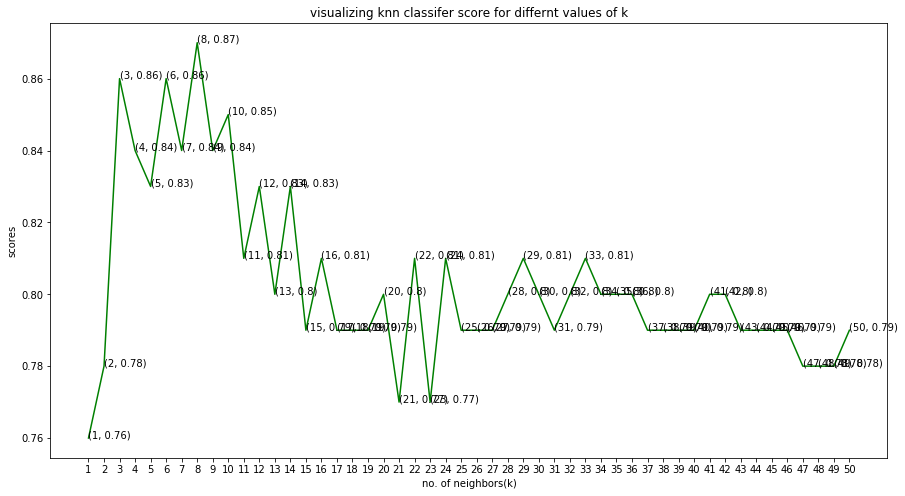

In [31]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,8)
plt.plot([k for k in range(1,51)], kscore, color ='green')
for i in range(1,51):
    plt.text(i, kscore[i-1], (i, kscore[i-1]) )   
plt.xticks([i for i in range(1,51)])
plt.xlabel('no. of neighbors(k)')
plt.ylabel('scores')
plt.title('visualizing knn classifer score for differnt values of k')

In [32]:
print(str(max(kscore)*100) + " %  accuracy by KNN classifier" )  #from graph we can see that we get max accuracy at k=42 and k=44
w = max(kscore)*100

87.0 %  accuracy by KNN classifier


 ##### SUPPORT VECTOR CLASSIFIER

In [33]:
from sklearn.svm import SVC

In [34]:
sc = SVC(kernel= 'linear')
sc1 = sc.fit(x_train, y_train)

In [35]:
pred4 = sc1.predict(x_test)

In [36]:
acc4 = accuracy_score(y_test, pred4)

print(str(acc4*100)+ " % "+ "accuracy by SVC , kernel = linear")
z = acc4*100

83.0 % accuracy by SVC , kernel = linear


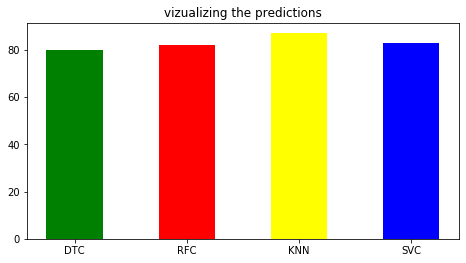

In [41]:
plt.rcParams['figure.figsize'] = (6,3)
fig = plt.figure()
a = fig.add_axes([0,0,1,1])
a.set_title("vizualizing the predictions")
a.bar('DTC', u, color='green', width= 0.5)
a.bar('RFC', v, color='red', width=0.5)
a.bar('KNN', w, color='yellow', width=0.5)
a.bar('SVC', z, color='blue',width=0.5)

plt.show()

 #### from above bar graph we can visualize that K nearest neighbour (KNN) bar is tallest hence the best fit to this data for prediction       
